## POWER CALCULATIONS

In [11]:

set.seed(1) ##so that we get same results

library(downloader)
url<-"https://raw.githubusercontent.com/genomicsclass/dagdata/master/inst/extdata/mice_pheno.csv"
filename <- tempfile()
download(url,destfile=filename)
dat <- read.csv(filename)

hfPopulation <- dat[dat$Sex=="F" & dat$Diet=="hf",3]
controlPopulation <- dat[dat$Sex=="F" & dat$Diet=="chow",3]

mu_hf <- mean(hfPopulation)
mu_control <- mean(controlPopulation)
print(mu_hf - mu_control)

N <- 5
hf <- sample(hfPopulation,N)
control <- sample(controlPopulation,N)
t.test(hf,control)

[1] 2.375517



	Welch Two Sample t-test

data:  hf and control
t = 1.7691, df = 4.686, p-value = 0.141
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.05907 15.73107
sample estimates:
mean of x mean of y 
   27.868    21.532 


### Type I , II Error
* We reject the Null hypothesis => Type I error => False Positive => The good guy was sentanced to guilty
* We didn't reject the Null hypotheis that we should => Type II error => False Negative

### Definition of power
 So the definition of power is the probability of rejecting the null when the null is false. So that's when you do it right, when you actually say there's a difference, and in fact there is. 

* The more variable of data, the bigger standard errors would be , the harder to it will be achive a small p , and then you'll need a larger data set to have power.

#### how often we reject it ?

In [24]:
N <- 30
alpha <- 0.05
B <- 10000

#simulations

reject <- function(N,alpha=0.05){
   hf <- sample(hfPopulation,N) 
   control <- sample(controlPopulation,N)
   pval <- t.test(hf,control)$p.value
   ifelse(pval < alpha,1,0)
}

rejections <- replicate(B,reject(N))
head(rejections)

mean(rejections)    # That's call power 

[1] 1 0 1 0 1 0

[1] 0.5579

#### Let's see how power improves with N:

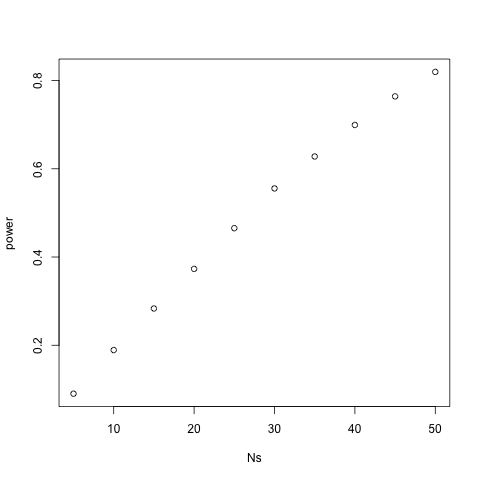

In [27]:
Ns <- seq(5,50,5)
power <- sapply(Ns,function(N){
  rejections <- replicate(B,reject(N))
  mean(rejections)
    })
plot(Ns,power)

#### "Power"    is one minus the Type II error rate, or the probability that you will reject the null hypothesis when the alternative hypothesis is true.
* We ask questions like "What is the smallest difference I could reliably distinguish from 0 given my sample size N?", or more commonly, "How big does N have to be in order to detect that the absolute value of the difference is greater than zero?" Type II error control plays a major role in designing data collection procedures before you actually see the data so that you know the test you will run has enough sensitivity or power. 

### POWER AND ALPHA

There are several aspects of a hypothesis test that affect its power for a particular effect size. Intuitively, setting a lower alpha decreases the power of the test for a given effect size because the null hypothesis will be more difficult to reject. This means that for an experiment with fixed parameters (i.e., with a predetermined sample size, recording mechanism, etc), the power o the hypothesis test trades off with its Type I error rate, no matter what effect size you target.

* Similarly if we change the level `alpha` at which we reject, power changes. The smaller I want the chance of type I error to be, the less power I will have. We can see this by writing similar code but keeping $N$ fixed and considering several values of `alpha`

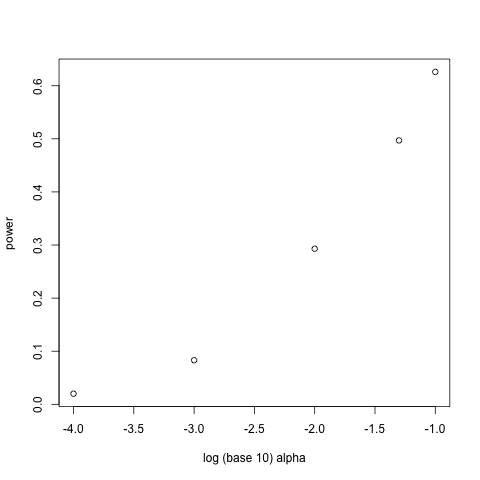

In [41]:
N<-30
alphas <- c(0.1,0.05,0.01,0.001,0.0001)
power <- sapply(alphas,function(alpha){
   rejections <- replicate(B,reject(N,alpha=alpha))
  mean(rejections)
})
plot(log10(alphas),power,xlab="log (base 10) alpha")

####  Homework: Power Calculation Assessment  (Q1.1 ~ Q1.4)

In [40]:
babies = read.table("babies.txt", header=TRUE)
bwt.nonsmoke = babies$bwt[babies$smoke==0]
bwt.smoke = babies$bwt[babies$smoke==1]

N <- 15
B <- 1000
Sig <- c(0.1,0.05,0.01)

reject <- function(N,alpha=0.01){
   smoke <- sample(bwt.smoke,N) 
   nonsmoke <- sample(bwt.nonsmoke,N)
   pval <- t.test(smoke,nonsmoke)$p.value
   ifelse(pval < alpha,1,0)
}

rejections <- replicate(B,reject(N))
mean(rejections)


[1] 0.109

# Association Tests

In [45]:
tab <- matrix(c(180,40,20,10),2,2)
rownames(tab) = c("AA or Aa","aa")
colnames(tab) = c("Control" ,"Cases")
prop.table(tab)

         Control Cases
AA or Aa    0.72  0.08
aa          0.16  0.04

In [46]:
prop.table(tab,1)

         Control Cases
AA or Aa     0.9   0.1
aa           0.8   0.2

In [47]:
ctest <- chisq.test(tab)
ctest


	Pearson's Chi-squared test with Yates' continuity correction

data:  tab
X-squared = 2.9001, df = 1, p-value = 0.08857


####  Homework: Association test (Q 2.1-2.2)

In [59]:
d = read.csv("assoctest.csv")
table(d)

      case
allele  0  1
     0 17 17
     1 10 28

In [58]:
chisq.test(table(d))


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(d)
X-squared = 3.3437, df = 1, p-value = 0.06746


In [60]:

fisher.test(table(d))


	Fisher's Exact Test for Count Data

data:  table(d)
p-value = 0.05194
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.940442 8.493001
sample estimates:
odds ratio 
  2.758532 


# Association tests 
* from http://genomicsclass.github.io/book/pages/association_tests.html

In [50]:
tab <- matrix(c(3,1,1,3),2,2)
rownames(tab)<-c("Poured Before","Poured After")
colnames(tab)<-c("Guessed before","Guessed after")
tab

              Guessed before Guessed after
Poured Before              3             1
Poured After               1             3

In [51]:
fisher.test(tab,alternative="greater")


	Fisher's Exact Test for Count Data

data:  tab
p-value = 0.2429
alternative hypothesis: true odds ratio is greater than 1
95 percent confidence interval:
 0.3135693       Inf
sample estimates:
odds ratio 
  6.408309 


# Chi-square test

In [65]:
disease=factor(c(rep(0,180),rep(1,20),rep(0,40),rep(1,10)),
               labels=c("control","cases"))
genotype=factor(c(rep("AA/Aa",200),rep("aa",50)),
                levels=c("AA/Aa","aa"))
dat <- data.frame(disease, genotype)
dat <- dat[sample(nrow(dat)),]##shuffle them up
tab <- table(genotype,disease)
tab

        disease
genotype control cases
   AA/Aa     180    20
   aa         40    10

* The typical statistics we use to summarize these results is the odds ratio (OR). We compute the odds of having the disease if you are an “aa”: 10/40, the odds of having the disease if you are an “AA/Aa”: 20/180, and take the ration: (10/40)/(20/180)

In [66]:
(tab[2,2]/tab[2,1]) / (tab[1,2]/tab[1,1])

[1] 2.25

* Now to compute p-value we don’t use the OR directly, we assume that there is no association between genotype and disease and compute what we expect to see in each cell. Note under the null that 200 and 50 individuals in each group were assigned disease with the same probability. If this is the case then the probability of disease is

In [68]:
p=mean(disease=="cases")
p

[1] 0.12

In [69]:
expected <- rbind(c(1-p,p)*sum(genotype=="AA/Aa"),
                  c(1-p,p)*sum(genotype=="aa"))
dimnames(expected)<-dimnames(tab)
expected

        disease
genotype control cases
   AA/Aa     176    24
   aa         44     6

In [70]:
chisq.test(tab)$p.value

[1] 0.08857435

# Large samples, small p-values
As we mentioned earlier reporting only p-values is not an appropriate way to report the results of your experiment. Many genetic association studies seem to over emphasize p-values. They have large sample sizes, report impressively small p-values, yet when one looks closely at the results, we realize odds ratios are quite modest: barely bigger than 1.

We note that there is not a one to one relationship between the odds ratio and the p-value. To demonstrate we re calculate the p-value keeping all the proportions identical but increasing the sample size by 10 which reduces the p-value substantially

In [71]:
tab<-tab*10
chisq.test(tab)$p.value

[1] 1.219624e-09

# Confidence intervals for the odd ratio
Computing confidence intervals for the OR is not mathematically straightforward. Unlike other statistics for which we have found approximations for their distributions, the OR is not only a ratio, but a ratio of ratio and there is not simple way of using, for example, the CLT.

One approach is to use the theory of generalized linear models which provides estimates of the log odds ratio, rather than the OR itself, that can be shown to be asymptotically normal. Here we provide R code without much details of what it is:



In [72]:
fit <- glm(disease~genotype,family="binomial",data=dat)
coeftab<- summary(fit)$coef
coeftab

              Estimate Std. Error   z value     Pr(>|z|)
(Intercept) -2.1972246  0.2356828 -9.322803 1.133070e-20
genotypeaa   0.8109302  0.4249074  1.908487 5.632834e-02

The second row of the table shown above gives you the estimate and SE of the log odds ratio and mathematical theory tells us the this estiamte is approximately normally distributed. We can therefore form a confidence interval and then exponentiate to provide a confidence interval for the OR.

In [73]:
ci <- coeftab[2,1] + c(-2,2)*coeftab[2,2]
exp(ci)


[1] 0.9618616 5.2632310

Note that the confidence includes 1, which is consistent with the p-value being bigger than 0.05. Also note that the p-value shown here is based on a different approximation to the one used by the Chi-square test which is why they differ.